# Make petrophysical logs from a striplog

In this recipe we will show how to extract data from petrophysical logs (issue #71)

First, import modules we might need

In [1]:
import matplotlib.pyplot as plt
% matplotlib inline

import numpy as np

import striplog
striplog.__version__

'0.6.1'

## Making a striplog

In [2]:
from striplog import Striplog, Legend
imgfile = "data/images/P-129_280_1935.png"

In [3]:
legend = Legend.default(name='nsdoe')

In [4]:
top = 280
base = 1935

In [5]:
strip = Striplog.from_img(imgfile, top, base, legend=legend)

/Users/Evan/anaconda/envs/welly/lib/python3.5/site-packages/striplog/striplog.py:529: UserWarning: from_img() is deprecated; please use from_image()
  warnings.warn(w)


If we call the plot method on the striplog we get the whole striplog

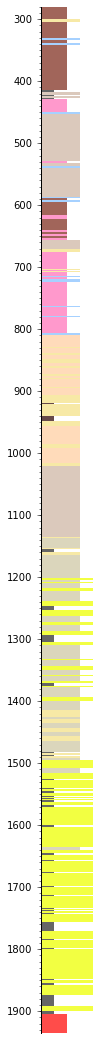

In [6]:
strip.plot(legend, ladder=True)

In [7]:
step = 1.0
liths = strip.to_log(step=step, start=strip.start.middle, legend=legend)
grainsize = strip.to_log(step=step, start=strip.start.middle, legend=legend, legend_field='width')

In [8]:
depth = np.arange(strip.start.middle, strip.stop.middle+step, step)

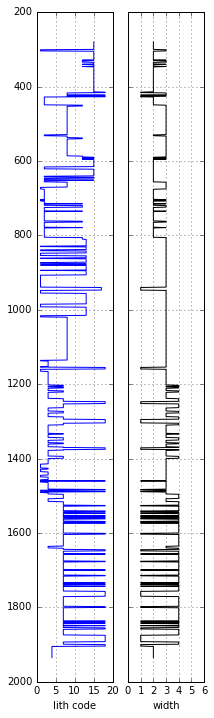

In [9]:
plt.figure(figsize=(3,12))
plt.subplot(121)
plt.plot(liths, depth)
plt.xlim(0,20)
plt.gca().invert_yaxis()
plt.xlabel('lith code')
plt.grid()

plt.subplot(122)
plt.plot(grainsize, depth,'k')
plt.gca().invert_yaxis()
plt.gca().set_yticklabels([])
plt.xlim(0,6)
plt.xlabel('width')
plt.grid()

To Do: Export new curves to LAS format